In [1]:
import torch
from torch import nn

import torchvision
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(f"PyTorch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 'Could not find module 'C:\Users\Admin\AppData\Local\Programs\Python\Python39\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


PyTorch version: 2.1.1+cu118
Torchvision version: 0.16.1+cu118


In [2]:
train_data = torchvision.datasets.FashionMNIST(
    root='./',
    train=True,
    download=False, # set True if you want to download dataset
    transform=ToTensor(),
    target_transform=None
)

test_data = torchvision.datasets.FashionMNIST(
    root='./',
    train=False,
    download=False,  # set True if you want to download dataset
    transform=ToTensor()
)

In [3]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
image.shape

torch.Size([1, 28, 28])

color-channels = 1 \
It means the images are grayscale \
\
Order of tensor is CHW (color, height, width) \
PyTorch accepts NCHW \
NHWC performs better and is considered as best practice

In [5]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, '9')

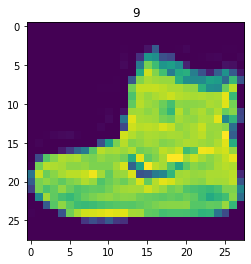

In [7]:
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

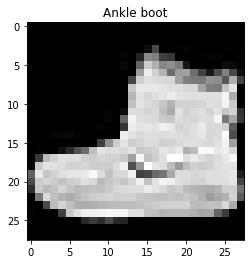

In [8]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])

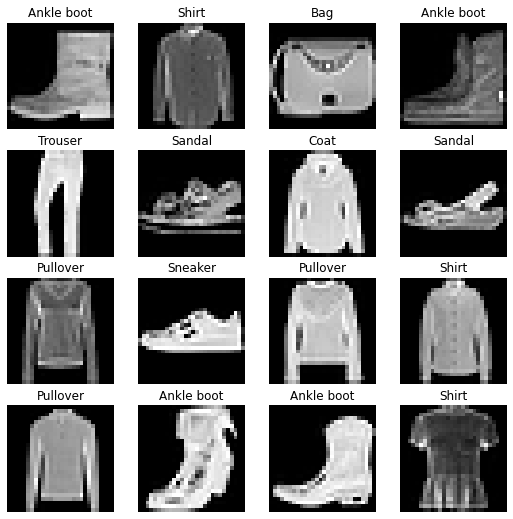

In [9]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [10]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

train_dataloader, test_dataloader, len(train_dataloader), len(test_dataloader)

(<torch.utils.data.dataloader.DataLoader at 0x20330786730>,
 1875,
 313)

In [11]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(train_features_batch.shape, train_labels_batch.shape)

test_features_batch, test_labels_batch = next(iter(test_dataloader))
print(test_features_batch.shape, test_labels_batch.shape)

torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])


In [12]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [13]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [14]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=(len(class_names))
)

model_0 = model_0.to(device)

In [15]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [16]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [17]:
from tqdm.auto import tqdm
torch.manual_seed(42)
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"---- Epoch: {epoch} ----")
    train_loss = 0
    for batch, (X,y) in enumerate(train_dataloader):
        X = X.to(device)
        y = y.to(device)
        model_0.train()
        y_pred = model_0(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")


    train_loss /= len(train_dataloader)

    test_loss, test_acc = 0.0, 0.0

    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            X = X.to(device)
            y = y.to(device)
            test_pred = model_0(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"Train loss: {train_loss:.5f} | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

  0%|          | 0/3 [00:00<?, ?it/s]

---- Epoch: 0 ----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.63550 | Test loss: 0.53123 | Test acc: 80.79%
---- Epoch: 1 ----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.49804 | Test loss: 0.56177 | Test acc: 80.53%
---- Epoch: 2 ----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.47273 | Test loss: 0.56868 | Test acc: 81.13%


In [18]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X = X.to(device)
            y = y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_acc": acc
    }

model_0_results = eval_model(model_0, test_dataloader, loss_fn, accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5679744482040405,
 'model_acc': 81.18011182108626}

## Introducing Non-Linearity

In [19]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [20]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, hidden_units=10, output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [21]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr = 0.1)

In [22]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0.0, 0.0
    model.to(device)
    for batch, (X,y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0.0, 0.0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            test_loss += loss_fn(y_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred = y_pred.argmax(dim=1))

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [23]:
torch.manual_seed(42)
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"---- epoch: {epoch} ----")
    train_step(
        model = model_1,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )

    test_step(
        model = model_1,
        data_loader=test_dataloader,
        loss_fn = loss_fn,
        accuracy_fn=accuracy_fn
    )

  0%|          | 0/3 [00:00<?, ?it/s]

---- epoch: 0 ----
Train loss: 1.09199 | Train acc: 61.34%
Test loss: 0.95690 | Test acc: 64.98%
---- epoch: 1 ----
Train loss: 0.73779 | Train acc: 73.69%
Test loss: 0.72388 | Test acc: 74.21%
---- epoch: 2 ----
Train loss: 0.66776 | Train acc: 76.08%
Test loss: 0.68751 | Test acc: 75.64%


In [24]:
torch.manual_seed(42)

model_1_results = eval_model(
    model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6873756051063538,
 'model_acc': 75.64896166134186}

In [31]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=2,
                stride=2
            )
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape))
       

    def forward(self,x):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x
    

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,  # no. of channels
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

The self.block_1 and self.block_2 consist of convolutional and pooling layers. These layers process the input tensor and gradually reduce its spatial dimensions. 

The nn.MaxPool2d layers in both self.block_1 and self.block_2 reduce the spatial dimensions by a factor of 2 

If input image is H x W. first block will make H/2 x W/2 and second block will make H/4 x W/4
Therefore 28/4 = 7

In [32]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr = 0.1)

In [33]:
torch.manual_seed(42)

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"---- epoch: {epoch} ----")
    train_step(
        model=model_2,
        data_loader=train_dataloader,
        loss_fn = loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )

    test_step(
        model = model_2,
        data_loader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

  0%|          | 0/3 [00:00<?, ?it/s]

---- epoch: 0 ----
Train loss: 0.59324 | Train acc: 78.43%
Test loss: 0.39841 | Test acc: 85.81%
---- epoch: 1 ----
Train loss: 0.36033 | Train acc: 87.03%
Test loss: 0.36894 | Test acc: 86.84%
---- epoch: 2 ----
Train loss: 0.32169 | Train acc: 88.40%
Test loss: 0.33992 | Test acc: 87.96%


In [34]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

In [35]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3392450213432312,
 'model_acc': 87.96924920127796}

In [42]:
# to make predictions

def make_predictions(model: torch.nn.Module, data: list, device: torch.device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device) # adding batch size
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)

In [43]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k = 9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape, test_labels[0], class_names[test_labels[0]]

(torch.Size([1, 28, 28]), 5, 'Sandal')

In [44]:
pred_probs = make_predictions(model=model_2, data=test_samples, device=device)
pred_probs

tensor([[2.2477e-07, 9.4016e-08, 3.3075e-07, 2.0379e-07, 6.1941e-08, 9.9499e-01,
         1.5130e-07, 1.8160e-04, 4.6454e-05, 4.7762e-03],
        [3.8779e-02, 7.8363e-01, 2.7348e-04, 1.4532e-01, 2.4388e-03, 9.6908e-06,
         2.8128e-02, 1.5213e-04, 1.2347e-03, 3.5666e-05],
        [1.2456e-06, 1.3437e-07, 1.7639e-06, 1.4444e-07, 3.1660e-07, 1.0291e-04,
         2.2996e-08, 9.7135e-01, 3.9663e-05, 2.8502e-02],
        [2.4785e-03, 2.9729e-04, 8.3328e-01, 1.7043e-03, 1.6016e-01, 7.7600e-06,
         1.1191e-03, 2.9668e-05, 9.0928e-04, 1.8863e-05],
        [1.5201e-01, 4.0004e-04, 1.6596e-04, 8.3432e-01, 1.0872e-04, 4.2672e-07,
         1.2513e-02, 6.0974e-05, 3.8871e-04, 2.8967e-05],
        [7.5034e-01, 2.1855e-04, 9.1985e-04, 5.8678e-03, 3.8044e-03, 4.5056e-07,
         2.3711e-01, 8.7859e-07, 1.7379e-03, 1.6135e-07],
        [2.8099e-04, 1.7882e-04, 1.1668e-01, 3.4929e-06, 8.6776e-01, 1.0025e-05,
         1.1133e-02, 6.0374e-06, 3.8755e-03, 6.5773e-05],
        [1.2785e-07, 5.4420

In [46]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 2, 3, 0, 4, 7, 1])

In [47]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

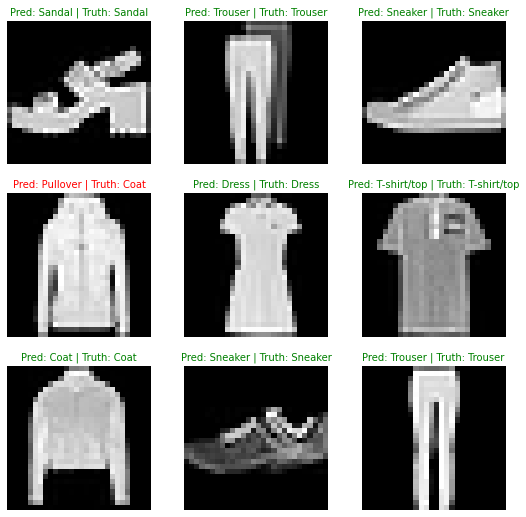

In [48]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False)

In [49]:
from tqdm.auto import tqdm

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    X, y = X.to(device), y.to(device)
    y_logit = model_2(X)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) 
    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [51]:
import torchmetrics, mlxtend
print(f"mlxtend version: {mlxtend.__version__}")
assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"

mlxtend version: 0.23.0


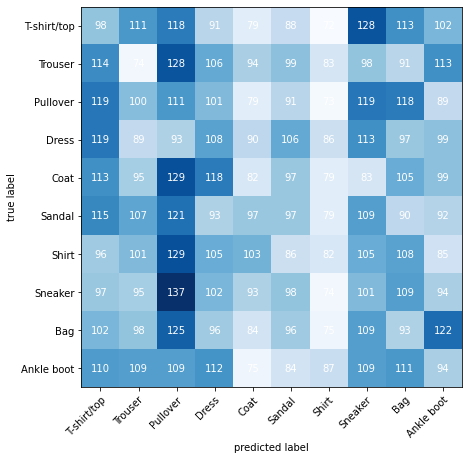

In [52]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)


fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names, 
    figsize=(10, 7)
)